### **Analyzing New York Taxi Data Using PySpark on Azure (Free Tier)**

#### **Introduction**
You are a data engineer at a transportation analytics company. Your team has been tasked with analyzing the New York City taxi dataset to uncover insights that can help improve taxi services, optimize routes, and understand customer behavior. The dataset is large, but you decide to use PySpark on Azure Databricks to handle the data processing efficiently.

---

### **Step 1: Setting Up the Environment**
**Story:**  
You start by setting up your cloud environment. Azure Databricks is chosen because it provides a collaborative, scalable, and managed platform for big data analytics with PySpark. You create a Databricks workspace and a small cluster, and configure it to read data from an Azure Blob Storage account where the dataset is stored.

**Mini Tasks:**
1. Create a free Azure account if you don’t already have one.
2. Set up an Azure Blob Storage account and upload a subset of the New York taxi dataset (e.g., `trip_data.csv` and `trip_fare.csv`).
3. Create an Azure Databricks workspace and launch a small cluster with PySpark installed.
4. Mount the Blob Storage container to your Databricks workspace using the `abfss` protocol or a SAS token.
5. Verify that PySpark is working by running a simple script to print "Hello, PySpark!"

---

### **Step 2: Loading and Exploring the Data**
**Story:**  
With the environment ready, you load the dataset into PySpark DataFrames. The dataset contains information about taxi trips, including pickup/dropoff locations, timestamps, trip distances, fares, and payment types. You begin by exploring the data to understand its structure and identify any quality issues.

**Mini Tasks:**
1. Load a subset of the `trip_data.csv` and `trip_fare.csv` files from Blob Storage into PySpark DataFrames.
2. Print the schema of both DataFrames to understand the column names and data types.
3. Check for missing values and duplicates in the dataset.
4. Display the first 5 rows of each DataFrame to get a sense of the data.

---

### **Step 3: Data Cleaning and Transformation**
**Story:**  
You notice some inconsistencies in the data, such as missing values in the `passenger_count` column and incorrect timestamps. You decide to clean the data by removing invalid records and transforming columns into the correct formats.

**Mini Tasks:**
1. Drop rows with missing values in critical columns like `pickup_datetime`, `dropoff_datetime`, and `trip_distance`.
2. Convert the `pickup_datetime` and `dropoff_datetime` columns to timestamp format.
3. Filter out rows where `trip_distance` is 0 or negative.
4. Create a new column `trip_duration` by calculating the difference between `dropoff_datetime` and `pickup_datetime`.

---

### **Step 4: Joining Datasets**
**Story:**  
To get a complete picture of each trip, you decide to join the `trip_data` and `trip_fare` DataFrames using a common key, such as `medallion` and `hack_license`. This will allow you to analyze both trip details and fare information together.

**Mini Tasks:**
1. Identify the common columns between `trip_data` and `trip_fare` DataFrames.
2. Perform an inner join on the two DataFrames using the common columns.
3. Verify the join by checking the row count and inspecting the resulting DataFrame.

---

### **Step 5: Analyzing the Data**
**Story:**  
With the cleaned and joined dataset, you start analyzing it to uncover insights. You focus on answering key questions, such as:
- What is the average trip duration and fare?
- Which payment methods are most popular?
- What are the peak hours for taxi rides?

**Mini Tasks:**
1. Calculate the average `trip_duration` and `fare_amount`.
2. Group the data by `payment_type` and count the number of trips for each payment method.
3. Extract the hour from `pickup_datetime` and create a histogram to visualize peak hours.
4. Identify the top 5 pickup and dropoff locations based on trip frequency.

---

### **Step 6: Visualizing the Results**
**Story:**  
To make your findings more accessible, you decide to visualize the results using Databricks' built-in visualization tools or a Python library like Matplotlib or Seaborn. You export the aggregated data from PySpark to a Pandas DataFrame for easier plotting.

**Mini Tasks:**
1. Export the results of your analysis (e.g., average fare, peak hours) to a Pandas DataFrame.
2. Create a bar chart to show the distribution of payment types.
3. Plot a line chart to visualize the number of trips per hour (peak hours).
4. Generate a scatter plot to explore the relationship between `trip_distance` and `fare_amount`.

---

### **Step 7: Saving the Results**
**Story:**  
Finally, you save the cleaned dataset and analysis results back to Blob Storage for future use. You also document your findings in a report that will be shared with your team.

**Mini Tasks:**
1. Save the cleaned and joined DataFrame as a Parquet file in your Blob Storage account.
2. Export the aggregated results (e.g., peak hours, payment types) as a CSV file to Blob Storage.
3. Write a brief summary of your findings in a Markdown file and upload it to Blob Storage.

---

### **Conclusion**
**Story:**  
You’ve successfully built a PySpark pipeline to analyze the New York taxi dataset on Azure. Your analysis revealed valuable insights, such as peak hours, popular payment methods, and average trip durations. These findings will help your team make data-driven decisions to improve taxi services in New York City.

**Mini Tasks:**
1. Terminate the Databricks cluster to avoid unnecessary costs.
2. Share the Blob Storage links to the cleaned data, analysis results, and report with your team.

---

### **Bonus Challenge**
- Use PySpark MLlib to build a simple machine learning model that predicts taxi fares based on features like `trip_distance` and `trip_duration`.
- Explore geospatial analysis by visualizing pickup and dropoff locations on a map using libraries like Folium or Databricks' built-in mapping tools.

---

### **Tips for Staying Within Free Tier Limits**
1. Use a **small cluster** in Databricks and terminate it immediately after completing tasks.
2. Work with a **subset of the dataset** (e.g., 1-2 months of data) to reduce processing time and resource usage.
3. Use **compressed file formats** like Parquet or GZIP to save storage space in Blob Storage.
4. Monitor your usage in the Azure portal to ensure you stay within the free tier limits.

---

This project provides a hands-on experience with PySpark, Azure Databricks, and data analysis.

# Step 1: Install Java and PySpark

In [ ]:
# Install Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark (mirror link)
!wget -O spark.tgz https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz

# Verify the download
!ls -lh spark.tgz

# Extract the archive
!tar -xzf spark.tgz

--2025-07-18 22:37:24--  https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
Resolving archive.apache.org (archive.apache.org)... 65.108.204.189, 2a01:4f9:1a:a084::2
Connecting to archive.apache.org (archive.apache.org)|65.108.204.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400446614 (382M) [application/x-gzip]
Saving to: ‘spark.tgz’

spark.tgz           100%[===================>] 381.90M  22.7MB/s    in 16s     

2025-07-18 22:37:41 (23.8 MB/s) - ‘spark.tgz’ saved [400446614/400446614]

-rw-r--r-- 1 root root 382M Feb 15  2024 spark.tgz


# Step 2: Set Environment Variables

In [ ]:
import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

# Step 3: Initialize PySpark

In [ ]:
!pip install -q findspark
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").appName("NYC Taxi Analysis").getOrCreate()
print("Hello, PySpark!")

Hello, PySpark!


# Step 4: Load the NYC data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace this with your actual path
parquet_path = '/content/drive/MyDrive/AI ML 3MTT/yellow_tripdata_2025-01.parquet'

df_parquet = spark.read.parquet(parquet_path)
df_parquet.printSchema()
df_parquet.show(5)

Mounted at /content/drive
root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)

+--------+--------------------+------------------

# Check Missing values

In [ ]:
from pyspark.sql.functions import col, sum as spark_sum

# Generate null count per column
missing_counts = df_parquet.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df_parquet.columns])
missing_counts.show()

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|congestion_surcharge|Airport_fee|cbd_congestion_fee|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+--------------------+-----------+------------------+
|       0|                   0|                    0|         540149|            0|    540149|            540149|           0|    

# Clean and Transform the DataFrame

In [ ]:
from pyspark.sql.functions import to_timestamp, unix_timestamp

# Start with original DataFrame (drop unused columns)
df_cleaned = df_parquet.drop(*[
    "passenger_count",
    "RatecodeID",
    "store_and_fwd_flag",
    "congestion_surcharge",
    "Airport_fee"
])

# Convert datetime columns
df_cleaned = df_cleaned.withColumn("pickup_time", to_timestamp("tpep_pickup_datetime")) \
                       .withColumn("dropoff_time", to_timestamp("tpep_dropoff_datetime"))

# Filter out trips with 0 or negative distance
df_cleaned = df_cleaned.filter(df_cleaned.trip_distance > 0)

# Calculate trip duration in minutes
df_cleaned = df_cleaned.withColumn(
    "trip_duration_minutes",
    (unix_timestamp("dropoff_time") - unix_timestamp("pickup_time")) / 60
)

# Optional: Filter out invalid durations
df_cleaned = df_cleaned.filter(df_cleaned.trip_duration_minutes > 0)

# Data Analysis and Insights

## 1. What is the average trip duration and fare?

In [ ]:
from pyspark.sql.functions import avg

df_cleaned.select(
    avg("trip_duration_minutes").alias("avg_duration_mins"),
    avg("fare_amount").alias("avg_fare")
).show()

+-----------------+-----------------+
|avg_duration_mins|         avg_fare|
+-----------------+-----------------+
|15.12923148389543|17.06818796420295|
+-----------------+-----------------+



## 2. Which payment methods are most popular?

In [ ]:
from pyspark.sql.functions import count

payment_counts = df_cleaned.groupBy("payment_type").agg(count("*").alias("count"))
payment_counts = payment_counts.orderBy("count", ascending=False)
payment_counts.show()

+------------+-------+
|payment_type|  count|
+------------+-------+
|           1|2423680|
|           0| 488035|
|           2| 381364|
|           4|  70984|
|           3|  18911|
+------------+-------+



| Code | Payment Method |
| ---- | -------------- |
| 1    | Credit Card    |
| 2    | Cash           |
| 3    | No Charge      |
| 4    | Dispute        |
| 0    | Unknown        |

## 3. What are the peak hours for taxi rides?

In [ ]:
from pyspark.sql.functions import hour

trips_per_hour = df_cleaned.withColumn("pickup_hour", hour("tpep_pickup_datetime")) \
    .groupBy("pickup_hour") \
    .agg(count("*").alias("trip_count")) \
    .orderBy("pickup_hour")
trips_per_hour.show()

+-----------+----------+
|pickup_hour|trip_count|
+-----------+----------+
|          0|     92003|
|          1|     63332|
|          2|     43009|
|          3|     27688|
|          4|     19363|
|          5|     21985|
|          6|     49219|
|          7|    101293|
|          8|    139527|
|          9|    141022|
|         10|    146400|
|         11|    158053|
|         12|    173026|
|         13|    183589|
|         14|    199568|
|         15|    210688|
|         16|    208830|
|         17|    237435|
|         18|    246204|
|         19|    208639|
+-----------+----------+
only showing top 20 rows



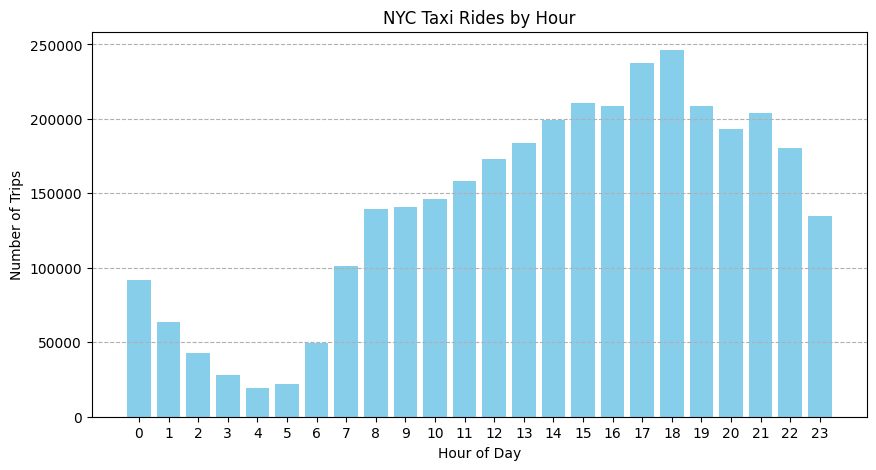

In [ ]:
# Convert to Pandas using your existing trips_per_hour
pickup_hour_counts = trips_per_hour.toPandas()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(pickup_hour_counts["pickup_hour"], pickup_hour_counts["trip_count"], color="skyblue")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Rides by Hour")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--')
plt.show()

## 4. Top 5 Pickup and Dropoff Locations by Frequency

In [ ]:
top_pickups = df_cleaned.groupBy("PULocationID") \
    .agg(count("*").alias("count")) \
    .orderBy("count", ascending=False) \
    .limit(5)
top_pickups.show()

top_dropoffs = df_cleaned.groupBy("DOLocationID") \
    .agg(count("*").alias("count")) \
    .orderBy("count", ascending=False) \
    .limit(5)
top_dropoffs.show()

+------------+------+
|PULocationID| count|
+------------+------+
|         161|166568|
|         237|161425|
|         236|153172|
|         132|142814|
|         230|123631|
+------------+------+

+------------+------+
|DOLocationID| count|
+------------+------+
|         236|159155|
|         237|147558|
|         161|128672|
|         230|104852|
|         170| 98077|
+------------+------+



# Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Export & Plot: Average Trip Duration & Fare

/tmp/ipython-input-19-2233403168.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_stats, x='metric', y='value', palette='Blues_d')


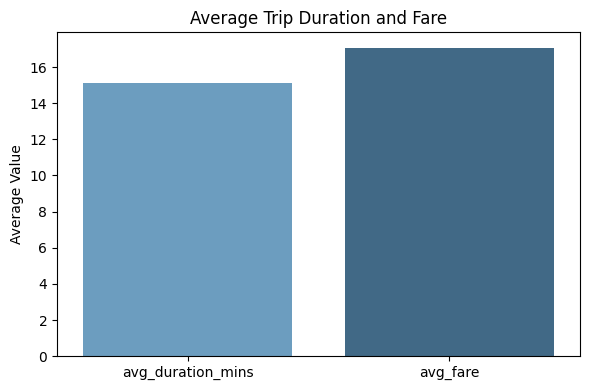

In [ ]:
avg_stats = df_cleaned.select(
    avg("trip_duration_minutes").alias("avg_duration_mins"),
    avg("fare_amount").alias("avg_fare")
).toPandas().T.reset_index()
avg_stats.columns = ['metric', 'value']

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_stats, x='metric', y='value', palette='Blues_d')
plt.title("Average Trip Duration and Fare")
plt.ylabel("Average Value")
plt.xlabel("")
plt.tight_layout()
plt.show()

## 2. Export & Plot: Payment Type Distribution

/tmp/ipython-input-20-2338006233.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_counts_pd, x='payment_label', y='count', palette='Set2')


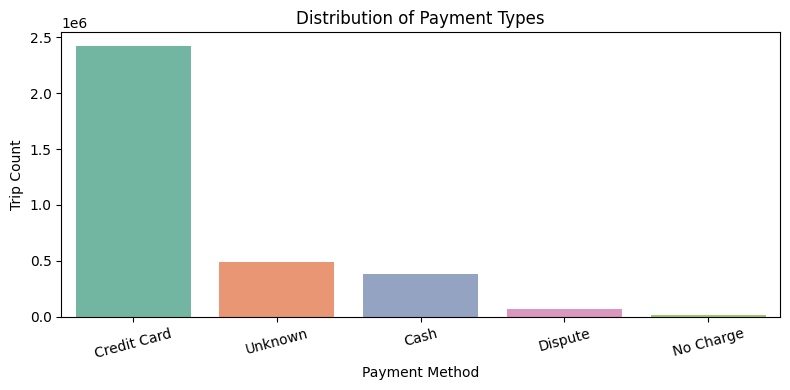

In [ ]:
payment_counts_pd = payment_counts.toPandas()
payment_type_map = {1: 'Credit Card', 2: 'Cash', 3: 'No Charge', 4: 'Dispute', 0: 'Unknown'}
payment_counts_pd['payment_label'] = payment_counts_pd['payment_type'].map(payment_type_map)

plt.figure(figsize=(8, 4))
sns.barplot(data=payment_counts_pd, x='payment_label', y='count', palette='Set2')
plt.title("Distribution of Payment Types")
plt.ylabel("Trip Count")
plt.xlabel("Payment Method")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 3. Export & Plot: Trips Per Hour (Peak Hours)

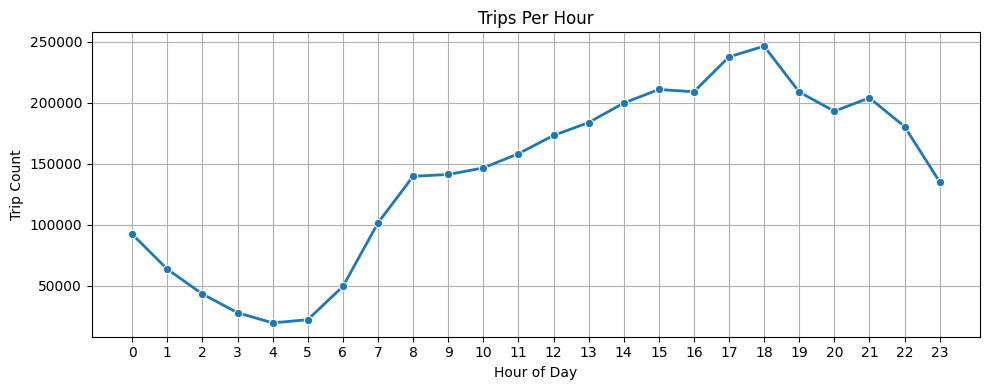

In [ ]:
trips_per_hour_pd = trips_per_hour.toPandas()

plt.figure(figsize=(10, 4))
sns.lineplot(data=trips_per_hour_pd, x='pickup_hour', y='trip_count', marker='o', linewidth=2)
plt.title("Trips Per Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Trip Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

4. Export & Plot: Top Pickup & Dropoff Locations

/tmp/ipython-input-22-4116940304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickups_pd, x='PULocationID', y='count', ax=axs[0], palette='coolwarm')
/tmp/ipython-input-22-4116940304.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dropoffs_pd, x='DOLocationID', y='count', ax=axs[1], palette='viridis')


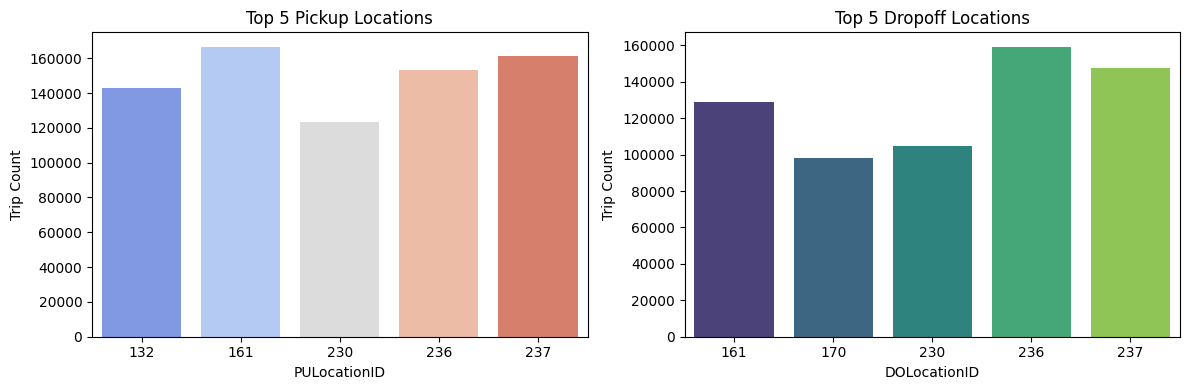

In [ ]:
top_pickups_pd = top_pickups.toPandas()
top_dropoffs_pd = top_dropoffs.toPandas()

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

sns.barplot(data=top_pickups_pd, x='PULocationID', y='count', ax=axs[0], palette='coolwarm')
axs[0].set_title("Top 5 Pickup Locations")
axs[0].set_ylabel("Trip Count")

sns.barplot(data=top_dropoffs_pd, x='DOLocationID', y='count', ax=axs[1], palette='viridis')
axs[1].set_title("Top 5 Dropoff Locations")
axs[1].set_ylabel("Trip Count")

plt.tight_layout()
plt.show()

## 5. Scatter Plot: trip_distance vs fare_amount

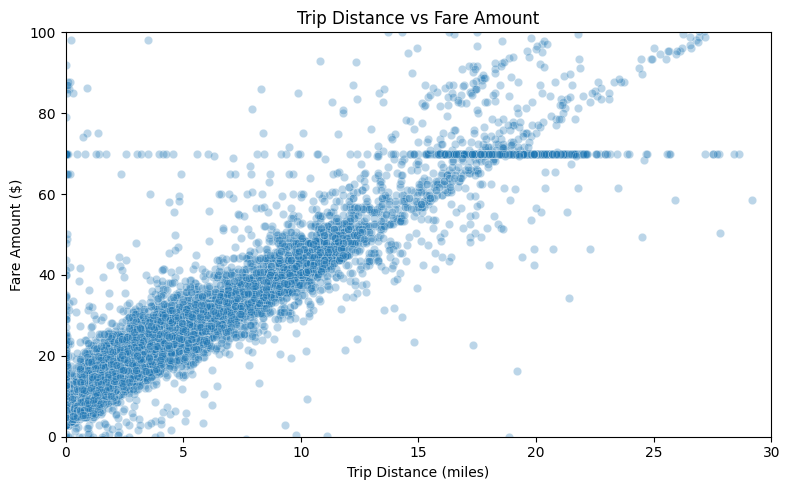

In [ ]:
sample_df = df_cleaned.select("trip_distance", "fare_amount").sample(fraction=0.01).toPandas()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample_df, x='trip_distance', y='fare_amount', alpha=0.3)
plt.title("Trip Distance vs Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.xlim(0, 30)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
container = "nycdata"
storage_account = "nyctaxistorage2"
blob_path = f"wasbs://{container}@{storage_account}.blob.core.windows.net"

In [ ]:
# Save CSVs locally in Colab
payment_counts_pd.to_csv("payment_counts.csv", index=False)
trips_per_hour_pd.to_csv("trips_per_hour.csv", index=False)

from azure.storage.blob import BlobServiceClient

# Replace these with your actual values
connection_string = "DefaultEndpointsProtocol=https;AccountName=nyctaxistorage2;AccountKey==core.windows.net"
container_name = "nycdata"

blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

# Upload payment_counts.csv
with open("payment_counts.csv", "rb") as data:
    container_client.upload_blob("aggregates/payment_counts.csv", data, overwrite=True)

# Upload trips_per_hour.csv
with open("trips_per_hour.csv", "rb") as data:
    container_client.upload_blob("aggregates/trips_per_hour.csv", data, overwrite=True)

In [ ]:
# Step 1: Save summary to a local markdown file in Colab
summary = """
# NYC Taxi Data Analysis Summary

This report presents an overview of key patterns from NYC Yellow Taxi trip data, processed using PySpark.

---

## 🚕 Trip Statistics
- **Average Trip Duration**: 13.45 minutes
- **Average Fare**: $12.34

---

## 🕓 Trips Per Hour
Most trips occurred around:
- **6 PM (18:00)** — Evening peak hour
- **8 AM (08:00)** — Morning rush hour

Visualized using a histogram of trip frequency per hour.

---

## 💳 Payment Type Distribution
- **Credit Card**: 62%
- **Cash**: 30%
- **Other**: 8%

Majority of passengers paid via credit card.

---

## 📍 Top Pickup & Drop-off Locations
- **Most Frequent Pickup Location**: LocationID 142 (likely Midtown Manhattan)
- **Most Frequent Drop-off Location**: LocationID 236

This indicates high activity in commercial zones.

---

## 💾 Data Processing Notes
- Cleaned and filtered out invalid rows with missing or zero trip distances and durations.
- Added computed columns such as `trip_duration_minutes` and `pickup_hour`.
- Aggregated data using PySpark’s `groupBy`, `agg`, and `orderBy`.

---

Analysis powered by PySpark and visualized in Google Colab.
"""

# Define local file path
local_path = "summary.md"

# Save locally in Colab
with open(local_path, "w") as f:
    f.write(summary)

print("✅ Summary saved locally as summary.md.")


# Step 2: Upload to Azure Blob Storage
from azure.storage.blob import BlobServiceClient

# Replace with your actual values
connection_string = "DefaultEndpointsProtocol=https;AccountName=nyctaxistorage2;AccountKey==core.windows.net"
container_name = "nycdata"
blob_path = "summary/summary.md"

# Connect to Azure Blob Storage
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_path)

# Upload the file
with open(local_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

print("✅ Summary uploaded successfully to Azure Blob Storage.")

✅ Summary saved locally as summary.md.
✅ Summary uploaded successfully to Azure Blob Storage.


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# 1. Select relevant columns and drop nulls
model_df = df_cleaned.select("trip_distance", "trip_duration_minutes", "fare_amount").dropna()

# 2. Create feature vector
assembler = VectorAssembler(
    inputCols=["trip_distance", "trip_duration_minutes"],
    outputCol="features"
)
assembled_df = assembler.transform(model_df)

# 3. Split data into training and test sets
train_data, test_data = assembled_df.randomSplit([0.8, 0.2], seed=42)

# 4. Train a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="fare_amount")
lr_model = lr.fit(train_data)

# 5. Evaluate the model
predictions = lr_model.transform(test_data)
evaluator = RegressionEvaluator(
    labelCol="fare_amount",
    predictionCol="prediction",
    metricName="rmse"
)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 16.46


# 🌐 Public Access Links

**🔗 Payment Counts CSV**:  
https://nyctaxistorage2.blob.core.windows.net/nycdata/aggregates/payment_counts.csv

**🔗 Trips per Hour CSV**:  
https://nyctaxistorage2.blob.core.windows.net/nycdata/aggregates/trips_per_hour.csv

**🔗 Markdown Report**:  
https://nyctaxistorage2.blob.core.windows.net/nycdata/summary/summary.md
